<a href="https://colab.research.google.com/github/WuraolaOyewusi/Exploring-Topic-Modelling-with-Gensim-on-the-Essential-Science-Indicators-Journals-List/blob/master/Topic_Modelling(Journals).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
journals_full= pd.read_excel('http://ipscience-help.thomsonreuters.com/incitesLiveESI/10678-TRS/version/default/part/AttachmentData/data/ESIMasterJournalList-122018.xlsx')

In [18]:
journals_full.head()

,Full title,Title29,Title20,ISSN,EISSN,Category name
0,2D Materials,2D MATER,2D MATER,2053-1583,2053-1583,MATERIALS SCIENCE
1,3 Biotech,3 BIOTECH,3 BIOTECH,2190-572X,2190-5738,BIOLOGY & BIOCHEMISTRY
2,3D Printing and Additive Manufacturing,3D PRINT ADDIT MANUF,3D PRINT ADDIT MANUF,2329-7662,2329-7670,ENGINEERING
3,4OR-A Quarterly Journal of Operations Research,4OR Q J OPER RES,4OR-Q J OPER RES,1619-4500,1614-2411,ENGINEERING
4,AAPG BULLETIN,AAPG BULL,AAPG BULL,0149-1423,1558-9153,GEOSCIENCES


In [0]:
journals = journals_full[['Full title']].copy()                   #Copy the column of interest 'Full title' into a different dataframe

In [0]:
journals.columns = ['Full title']


In [28]:
journals.head()

,Full title
0,2D Materials
1,3 Biotech
2,3D Printing and Additive Manufacturing
3,4OR-A Quarterly Journal of Operations Research
4,AAPG BULLETIN


In [0]:
from gensim.utils import tokenize

In [0]:
unwanted =["Journal" ,"journal"]
def remove_unwanted(text):                                          #DEfine a simple function to filter out the word 'Journal' since it is contained in almost every title
  return [word for word in tokenize(text) if word not in unwanted]
  

In [31]:
test = 'abike is a journal Journal'                                #Testing defined function,it works!!!!!
remove_unwanted(test)

['abike', 'is', 'a']

In [0]:
journals['Full title'] = journals['Full title'].apply(lambda x: remove_unwanted(x.lower()))         #apply lambda function to remove unwanted words

In [33]:
journals.tail()

,Full title
11722,[zoosystema]
11723,[zootaxa]
11724,[zuchtungskunde]
11725,[zygon]
11726,[zygote]


In [0]:
journals['Full title'] = journals['Full title'].apply(lambda x: (', '.join(x)))                    #convert list back into string

In [35]:
journals.head()

,Full title
0,"d, materials"
1,biotech
2,"d, printing, and, additive, manufacturing"
3,"or, a, quarterly, of, operations, research"
4,"aapg, bulletin"


In [0]:
from gensim.parsing.preprocessing import preprocess_string,strip_tags,strip_punctuation,strip_numeric,remove_stopwords

Gensim has a module to preprocess string but I will filter out functions I do not want from the module and apply

In [0]:
filters=[lambda x: x.lower(),strip_tags,strip_punctuation,strip_numeric,remove_stopwords]

In [0]:
journals['Full title'] = journals['Full title'].apply(lambda x: preprocess_string(x,filters))

In [39]:
journals.head()                                                                                   #check if the preprocessing works, it works

,Full title
0,"[d, materials]"
1,[biotech]
2,"[d, printing, additive, manufacturing]"
3,"[quarterly, operations, research]"
4,"[aapg, bulletin]"


In [0]:
from gensim.corpora.dictionary import Dictionary

In [0]:
journals_dictionary = Dictionary(journals['Full title'])

In [42]:
print(journals_dictionary.token2id)

{'d': 0, 'materials': 1, 'biotech': 2, 'additive': 3, 'manufacturing': 4, 'printing': 5, 'operations': 6, 'quarterly': 7, 'research': 8, 'aapg': 9, 'bulletin': 10, 'aaps': 11, 'pharmscitech': 12, 'aatcc': 13, 'review': 14, 'abacus': 15, 'accounting': 16, 'business': 17, 'finance': 18, 'studies': 19, 'abdominal': 20, 'radiology': 21, 'abhandlungen': 22, 'aus': 23, 'dem': 24, 'der': 25, 'hamburg': 26, 'mathematischen': 27, 'seminar': 28, 'universitat': 29, 'abstracts': 30, 'american': 31, 'chemical': 32, 'papers': 33, 'society': 34, 'academia': 35, 'administracion': 36, 'latinoamericana': 37, 'revista': 38, 'academic': 39, 'emergency': 40, 'medicine': 41, 'pediatrics': 42, 'psychiatry': 43, 'academy': 44, 'annals': 45, 'management': 46, 'education': 47, 'learning': 48, 'perspectives': 49, 'acarologia': 50, 'accident': 51, 'analysis': 52, 'prevention': 53, 'accountability': 54, 'assurance': 55, 'policies': 56, 'quality': 57, 'auditing': 58, 'forum': 59, 'horizons': 60, 'organizations': 61

In [43]:
journals_dictionary[1]

'materials'

In [0]:
journals_corpus = [journals_dictionary.doc2bow(text) for text in journals['Full title']]

In [45]:
journals_corpus[1:4]

[[(2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1)]]

In [0]:
from gensim.models.ldamodel import LdaModel

In [0]:
lda = LdaModel(journals_corpus,num_topics=20,id2word=journals_dictionary,random_state=0)

In [48]:
lda_topics = lda.print_topics(num_words=5)
for topic in lda_topics:
  print(topic)

(0, '0.154*"review" + 0.027*"law" + 0.021*"sociological" + 0.020*"business" + 0.015*"modelling"')
(1, '0.187*"science" + 0.086*"engineering" + 0.062*"materials" + 0.038*"applications" + 0.030*"physical"')
(2, '0.095*"technology" + 0.066*"science" + 0.044*"international" + 0.040*"mathematics" + 0.032*"nursing"')
(3, '0.105*"medicine" + 0.069*"molecular" + 0.059*"biology" + 0.024*"experimental" + 0.022*"physiology"')
(4, '0.088*"physics" + 0.063*"quarterly" + 0.042*"oncology" + 0.040*"theoretical" + 0.025*"cancer"')
(5, '0.129*"revista" + 0.062*"chemistry" + 0.060*"fur" + 0.024*"language" + 0.017*"statistics"')
(6, '0.120*"society" + 0.064*"mathematical" + 0.046*"seminars" + 0.037*"nature" + 0.027*"communications"')
(7, '0.101*"studies" + 0.035*"american" + 0.034*"russian" + 0.034*"new" + 0.030*"south"')
(8, '0.027*"current" + 0.023*"natural" + 0.020*"topics" + 0.018*"microbiology" + 0.018*"disorders"')
(9, '0.033*"tropical" + 0.028*"disease" + 0.027*"pediatric" + 0.025*"health" + 0.024*

In [0]:
def custom_preprocess(sentence):                         #Define a custom preprocess function for the test documents, this can also be applied to pandas dataframe series
  sentence = sentence.lower()
  no_stopwords = remove_stopwords(sentence)
  tokens = tokenize(no_stopwords)
  no_punctuation = strip_punctuation(no_stopwords)
  unwanted = remove_unwanted(no_punctuation)
  return unwanted

In [50]:
test_doc = 'Health and Medicine'
test_doc = custom_preprocess(test_doc)
test_doc_bow = journals_dictionary.doc2bow(test_doc)
print(test_doc_bow)

[(41, 1), (150, 1)]


In [51]:
print(lda[test_doc_bow])

[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.35434258), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.34565744), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.016666668), (19, 0.016666668)]


In [52]:
test_doc2 = 'Material and physics'
test_doc2 = custom_preprocess(test_doc2)
test_doc_bow2 = journals_dictionary.doc2bow(test_doc2)
print(test_doc_bow2)

[(126, 1), (3354, 1)]


In [53]:
print(lda[test_doc_bow2])

[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.33998513), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.016666668), (19, 0.3600149)]


In [54]:
!pip install pyLDAvis

    100% |████████████████████████████████| 1.6MB 13.9MB/s 
  Running setup.py bdist_wheel for pyLDAvis ... - \ done
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [55]:
import pyLDAvis.gensim                             #Play around with the interactive pyLDAvis image
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, journals_corpus, journals_dictionary)

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
3      6.398425        1       1 -0.120195  0.082608
1      6.246360        1       2  0.218854  0.163016
19     6.014769        1       3 -0.104911  0.129646
7      5.854873        1       4 -0.142906  0.085247
11     5.713687        1       5  0.091805  0.024370
2      5.487563        1       6  0.106932  0.148454
10     5.434247        1       7 -0.062003  0.094451
18     5.265355        1       8 -0.048654 -0.007887
6      4.929148        1       9  0.047711 -0.078678
14     4.786619        1      10 -0.033308 -0.016418
5      4.730888        1      11  0.140641 -0.141813
15     4.615487        1      12 -0.085104 -0.043782
16     4.570151        1      13 -0.067433  0.062885
9      4.564246        1      14 -0.054570 -0.063665
0      4.498946        1      15 -0.109920 -0.103886
4      4.358832        1      16  0.110341 -0.060709
8      4.292309        1      17  0.014547 -0.080689
12     4.267952        1      18  0.123986 -0.003890
13     4.186926        1      19  0.000814 -0.018767
17     3.783210        1      20 -0.026626 -0.170495, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
8     Default  653.000000       research  653.000000  30.0000  30.0000
133   Default  551.000000        science  551.000000  29.0000  29.0000
14    Default  351.000000         review  351.000000  28.0000  28.0000
38    Default  201.000000        revista  201.000000  27.0000  27.0000
34    Default  206.000000        society  206.000000  26.0000  26.0000
19    Default  211.000000        studies  211.000000  25.0000  25.0000
41    Default  283.000000       medicine  283.000000  24.0000  24.0000
441   Default  193.000000         social  193.000000  23.0000  23.0000
102   Default  220.000000     technology  220.000000  22.0000  22.0000
379   Default  176.000000        reviews  176.000000  21.0000  21.0000
121   Default  255.000000    engineering  255.000000  20.0000  20.0000
427   Default  158.000000     psychology  158.000000  19.0000  19.0000
126   Default  162.000000        physics  162.000000  18.0000  18.0000
406   Default  155.000000      molecular  155.000000  17.0000  17.0000
47    Default  144.000000      education  144.000000  16.0000  16.0000
1     Default  159.000000      materials  159.000000  15.0000  15.0000
2246  Default  104.000000    zeitschrift  104.000000  14.0000  14.0000
139   Default  151.000000      chemistry  151.000000  13.0000  13.0000
150   Default  220.000000         health  220.000000  12.0000  12.0000
107   Default  111.000000   mathematical  111.000000  11.0000  11.0000
1095  Default   97.000000            fur   97.000000  10.0000  10.0000
368   Default  104.000000         policy  104.000000   9.0000   9.0000
7     Default  106.000000      quarterly  106.000000   8.0000   8.0000
77    Default  133.000000   transactions  133.000000   7.0000   7.0000
136   Default  180.000000        biology  180.000000   6.0000   6.0000
46    Default  185.000000     management  185.000000   5.0000   5.0000
371   Default  115.000000            law  115.000000   4.0000   4.0000
72    Default  140.000000        systems  140.000000   3.0000   3.0000
1594  Default   80.000000          world   80.000000   2.0000   2.0000
344   Default  192.000000       sciences  192.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
1172  Topic20    9.288223     thrombosis   10.105341   3.1903  -4.9031
686   Topic20    8.603413       pharmacy    9.420530   3.1839  -4.9797
4622  Topic20    8.193380           nova    9.010498   3.1795  -5.0285
1843  Topic20   43.241543          north   47.820129   3.1740  -3.3651
719   Topic20    7.631130           lung    8.448247   3.1729  -5.0996
864   Topic20    7.520010       clinique    8.337128   3.1714  -5.1143
2098  Topic20    7.479

In [56]:
from gensim.models import CoherenceModel
lda_cm=CoherenceModel(model=lda,corpus=journals_corpus,dictionary=journals_dictionary,texts= journals['Full title'],coherence='c_v')
LDA_cm=lda_cm.get_coherence()
LDA_cm

0.6518449165465334

In [0]:
from gensim.models.lsimodel import LsiModel

In [0]:
lsi = LsiModel(corpus=journals_corpus,id2word=journals_dictionary,num_topics=20)

In [59]:
lsi_topics = lsi.print_topics()
for topic in lsi_topics:
  print(topic)

(0, '-0.691*"research" + -0.614*"international" + -0.249*"science" + -0.114*"review" + -0.092*"technology" + -0.092*"engineering" + -0.079*"health" + -0.055*"management" + -0.047*"materials" + -0.047*"clinical"')
(1, '-0.704*"research" + 0.659*"international" + 0.209*"science" + 0.075*"engineering" + 0.064*"review" + 0.058*"technology" + 0.031*"management" + 0.031*"law" + 0.028*"systems" + 0.026*"studies"')
(2, '-0.874*"science" + 0.377*"international" + -0.218*"technology" + -0.122*"engineering" + -0.083*"materials" + 0.055*"research" + -0.039*"transactions" + -0.039*"environmental" + -0.037*"food" + -0.031*"political"')
(3, '0.910*"review" + 0.170*"law" + -0.143*"international" + 0.138*"european" + 0.124*"annual" + 0.091*"economic" + 0.091*"american" + 0.087*"psychology" + 0.082*"economics" + 0.066*"health"')
(4, '0.881*"engineering" + -0.213*"science" + 0.188*"transactions" + 0.131*"ieee" + 0.110*"systems" + 0.105*"chemical" + 0.103*"sciences" + -0.097*"international" + 0.086*"medic

In [60]:
test_doc = 'Journal of medicines and herbs'
test_doc = custom_preprocess(test_doc)
test_doc_bow = journals_dictionary.doc2bow(test_doc)
print(test_doc_bow)

[(1865, 1)]


In [61]:
print(lsi[test_doc_bow])

[(0, -1.885618626115403e-05), (1, -7.556293423728867e-06), (2, -1.1476296586228168e-05), (3, 2.4007738904498662e-05), (4, 9.058533324637886e-06), (5, 9.979928611172531e-06), (6, -3.9493889378303144e-05), (7, -7.022946333038995e-05), (8, 4.6945237906171094e-05), (9, 8.369990252384416e-06), (10, -3.63339632331654e-05), (11, -4.3118491395689747e-05), (12, -9.23643826695076e-05), (13, -3.3408478716014464e-05), (14, -0.00015047021635397227), (15, 0.00022345569542641384), (16, -4.096643763960775e-05), (17, 4.1932438249685746e-05), (18, 7.733676154379446e-05), (19, -9.444759454767056e-05)]


In [62]:
test_doc2 = 'Material and physics'
test_doc2 = custom_preprocess(test_doc2)
test_doc_bow2 = journals_dictionary.doc2bow(test_doc2)
print(test_doc_bow2)

[(126, 1), (3354, 1)]


In [63]:
print(lsi[test_doc_bow2])

[(0, -0.025868885308387837), (1, 0.012124891762579464), (2, -0.009475421380795228), (3, 0.020725363133262443), (4, 0.027571948619467147), (5, 0.04224930506901454), (6, -0.026931072238533728), (7, 0.04583248001464995), (8, 0.16129600506355513), (9, -0.19041654825044488), (10, -0.20209498366301704), (11, 0.19565354571791257), (12, -0.09170714103499128), (13, -0.07054888572709397), (14, -0.08625363396541753), (15, 0.02833496803784554), (16, 0.0280858923601745), (17, 0.006604630270058122), (18, 0.06594374134402312), (19, 0.37685627723878184)]


In [64]:
lsi_cm=CoherenceModel(model=lsi,corpus=journals_corpus,dictionary=journals_dictionary,texts= journals['Full title'],coherence='c_v')
LSI_cm=lsi_cm.get_coherence()
LSI_cm

0.45634852043376506

In [0]:
from gensim.models.hdpmodel import HdpModel

In [0]:
hdp = HdpModel(corpus=journals_corpus,id2word=journals_dictionary)

In [67]:
hdp_topics = hdp.print_topics()
for topic in hdp_topics:
  print(topic)

(0, '0.001*latina + 0.001*enzymology + 0.001*reduction + 0.001*bildgebenden + 0.001*assurance + 0.001*fitotecnia + 0.001*gesundheitspsychologie + 0.001*papers + 0.001*urinary + 0.001*ginseng')
(1, '0.001*reports + 0.001*movimento + 0.001*spin + 0.001*archivos + 0.001*secure + 0.001*contraception + 0.001*venereologie + 0.001*studies + 0.001*argumentation + 0.001*hepato')
(2, '0.001*ankara + 0.001*science + 0.001*seizure + 0.001*para + 0.001*signalling + 0.001*osterreichischen + 0.001*vjesnik + 0.001*lecture + 0.001*parasitology + 0.001*radiotherapy')
(3, '0.002*instructional + 0.001*hand + 0.001*matematik + 0.001*management + 0.001*adansonia + 0.001*glycobiology + 0.001*universe + 0.001*paleontologia + 0.001*graphics + 0.001*phytopathologia')
(4, '0.001*fourier + 0.001*estonian + 0.001*caribbean + 0.001*genetika + 0.001*mens + 0.001*allelopathy + 0.001*neuroscientist + 0.001*kyklos + 0.001*hippokratia + 0.001*contaminacion')
(5, '0.001*seizure + 0.001*fishery + 0.001*sur + 0.001*cahiers

In [68]:
test_doc = 'Journal of medicines and herbs'
test_doc = custom_preprocess(test_doc)
test_doc_bow = journals_dictionary.doc2bow(test_doc)
print(test_doc_bow)

[(1865, 1)]


In [69]:
print(hdp[test_doc_bow])

[(102, 0.5033501067684076)]


In [70]:
test_doc2 = 'Material and physics'
test_doc2 = custom_preprocess(test_doc2)
test_doc_bow2 = journals_dictionary.doc2bow(test_doc2)
print(test_doc_bow2)

[(126, 1), (3354, 1)]


In [71]:
print(hdp[test_doc_bow2])

[(61, 0.6690903764435027)]


In [72]:
hdp_cm=CoherenceModel(model=hdp,corpus=journals_corpus,dictionary=journals_dictionary,texts= journals['Full title'],coherence='c_v')
HDP_cm=hdp_cm.get_coherence()
HDP_cm

0.7233592459579684

In [0]:
coherence = {'LDA_cm':0.6518,'LSI_cm':0.4763,'HDP_cm':0.7234}

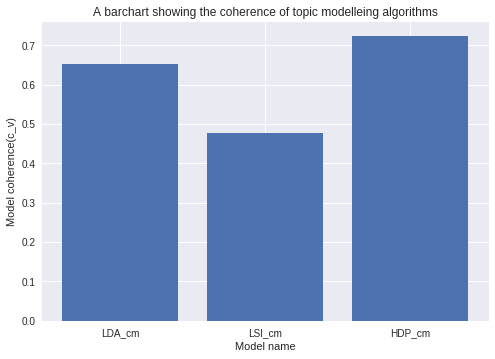

In [74]:
import matplotlib.pyplot as plt
coherence_value = list(coherence.values())
model_name = list(coherence.keys())
plt.bar(range(len(model_name)),coherence_value,tick_label=model_name)
plt.title('A barchart showing the coherence of topic modelleing algorithms')
plt.xlabel('Model name')
plt.ylabel('Model coherence(c_v)')
plt.show()